In [2]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

## L1 Regression

### $L^1$ norm (Manhattan distance)

p-norm : $\lVert x {\rVert}_p$ = $(\sum_{i=1}^n |x_i|^p)^{\frac{1}{p}}$

1-norm : $\lVert x {\rVert}_1$ = $\sum_{i=1}^n |x_i|$

#### Example of the format $\mathbf{b} = \mathbf{A} \mathbf{x} + \varepsilon$

Generate a matrix $\mathbf{A}, \mathbf{b}$ and plot the error, $\varepsilon$.

In [10]:
# Generate matrix A and b
N = 10 # we have 10 set of points
x = np.random.random(10)
# add column of 1's in front of the matrix to account for B0:
A = np.vander(x, N=2, increasing=True) 
b = np.random.random(10)
print(A)
print(b)

[[1.         0.95777209]
 [1.         0.71579171]
 [1.         0.58719454]
 [1.         0.35776941]
 [1.         0.3338922 ]
 [1.         0.86217468]
 [1.         0.95802051]
 [1.         0.07823915]
 [1.         0.53316236]
 [1.         0.56999259]]
[0.49784826 0.89349542 0.97001152 0.41249578 0.7526721  0.25492807
 0.23615198 0.31095184 0.27803477 0.77483682]


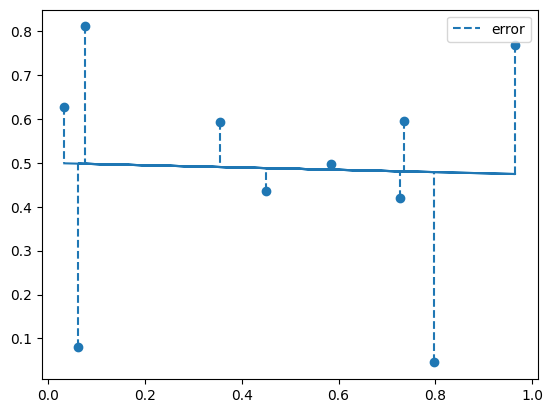

In [3]:
b1,b0 = np.polyfit(x, b, 1)
plt.scatter(x,b)
plt.plot(x, b1*x+b0)
plt.vlines(x, ymin = b, ymax = b1*x+b0, label = 'error', linestyle='dashed')
plt.legend()
plt.show()

### $L^1$ - Regression

* minimizing the sum of absolute deviations 
* less sensitive to outliers than least squares regression

#### Transform to optimization problem: 

Objective function: $\min \varepsilon = \displaystyle \min_x \|b-Ax|\|_1$

$L^1$ regression uses $L^1$-norm to find the vector $x$:
$$\displaystyle\min_x \|b-Ax|\|_1 = \min \sum_{i=1}^n |b-Ax|$$

which is equivalent to: 
$$
\begin{align*}
\displaystyle\min \sum_i t_i\\
\text{subject to} && t_i - |\mathbf{b}-\mathbf{Ax}| = 0 
\end{align*}
$$
and therefore we have:
$$
\begin{align*}
\displaystyle\min \sum_i t_i\\
\text{subject to} && -\mathbf{t}-\mathbf{Ax} \leq -\mathbf{b} \\
&& -\mathbf{t} + \mathbf{Ax} \leq \mathbf{b}
\end{align*}
$$


### Linear Algebra Review



Let $Ax = b$ and A be a $m \times n$

* case 1: m = n (square matrix)
    - unique solution: If matrix A is non-singular
    - infinitely many solution: If matrix A is singular and b $\in$ span(A)
    - no solution: If matrix A is singular and b $\notin$ span(A)
* case 2: m < n (underdetermined)
    - infinitely many solution: If matrix A is non-singular or matrix A is singular and b $\in$ span(A)
    - no solution: If matrix A is singular and b $\notin$ span(A)
* case 3: m > n (overdetermined)
    - unique solution: If matrix A is non-singular and b $\in$ span(A)
    - infinitely many solution: If matrix A is non-singular and b $\in$ span(A)
    - no solution: If matrix A is non-singular and b $\notin$ span(A) or If matrix A is singular and b $\notin$ span(A)


soure: MATH 307 notes

For linear optimization, we also have overdetermined and underdetermined systems. 

**Overdetermined systems:**

The matrix A has m > n, so there are more constraints than variables. This will most likely result in no solution, so there is little possibility that we have $\mathbf{b}=\mathbf{Ax}$. So, the goal is to minimize the error $\varepsilon$ to get the best fit line. 

**Underdetermined systems:**

The matrix has m < n, so there are more variables than constraints. It is likely to have infinitely many solutions. This is different than the previous explanations. The solution is unbounded if there are infinitely many solutions, so we need to have a way to select the feasible region to obtain an optimal solution instead of minimizing the error.

source: Math 441 notes

### $L^1$ regression application: Real estate price prediction

The dataset can be found from: https://statso.io/real-estate-prediction-case-study/

**1. Define the problem**

In [3]:
import pandas as pd

data = pd.read_csv('Real_Estate.csv')
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


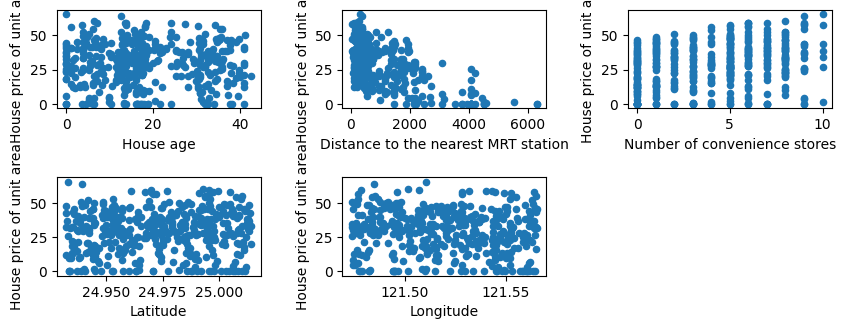

In [4]:
# plot data 

df1 = data[['House age','House price of unit area']].copy()
df2 = data[['Distance to the nearest MRT station','House price of unit area']].copy()
df3 = data[['Number of convenience stores','House price of unit area']].copy()
df4 = data[['Latitude','House price of unit area']].copy()
df5 = data[['Longitude','House price of unit area']].copy()

fig, axs = plt.subplots(2, 3, figsize=(10,7))

df1.plot.scatter(x= 'House age', y = 'House price of unit area', ax=axs[0,0])
df2.plot.scatter(x = 'Distance to the nearest MRT station', y = 'House price of unit area', ax=axs[0,1])
df3.plot.scatter(x = 'Number of convenience stores', y = 'House price of unit area', ax=axs[0,2])
df4.plot.scatter(x = 'Latitude', y = 'House price of unit area', ax=axs[1,0])
df5.plot.scatter(x = 'Longitude', y = 'House price of unit area', ax=axs[1,1])

axs[1,2].axis('off')
plt.subplots_adjust(bottom=0.5, wspace = 0.4, hspace = 0.7)
plt.show()

In [5]:
# removing outliers so it doesn't affect the l1 regression 
data = data.drop(data.columns[0], axis = 1) # drop first column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
# new data
data = data[-((data < lb) | (data > ub)).any(axis = 1)]

Problem : Given the house age, distance to the MRT station, number of convenience stores, latitude, and longitude, find the best-fit line to get the approximate house price per unit area. 

**2. Identify the variables and parameters**

Variables: 

1. $x_1$: house age
2. $x_2$: distance to the nearest MRT station
3. $x_3$: nearest convenience stores
4. $x_4$: latitude
5. $x_5$: longitude
6. b = house price of unit area

Multiple Linear Regression:
$$
\mathbf{b} = Ax+ \varepsilon \\
\mathbf{b} = \beta_0 + \beta_1 \mathbf{x_1} + \beta_2 \mathbf{x_2} + \beta_3 \mathbf{x_3} + \beta_4 \mathbf{x_4} + \beta_5 \mathbf{x_5}+ \varepsilon \\
$$

**3. State the assumptions and constraints:**

Assumptions:

- let the data be divided into training and testing data by 0.8 and 0.2
- let the constant be 30


constraints:
$$-\mathbf{t}-\mathbf{Ax} \leq -\mathbf{b} \\
-\mathbf{t} + \mathbf{Ax} \leq \mathbf{b} \\
x \geq 0$$


**4. Build the solution** (using scipy.linprog)

To find the coeefficient of each variables, we can form the matrix:

$$
\begin{bmatrix}
-\mathbf{A} & -\mathbf{I} \\
\mathbf{A} & -\mathbf{I} \\
\end{bmatrix}

\begin{bmatrix}
\mathbf{x} \\
\mathbf{t} \\
\end{bmatrix}
=
\begin{bmatrix}
-\mathbf{y} \\
\mathbf{y} \\
\end{bmatrix}

$$

The above is equivalent to computing $-\mathbf{Ax} -\mathbf{t} \leq -\mathbf{b} \text{ and } \mathbf{Ax} -\mathbf{t} \leq \mathbf{b}$. Then, using linear optimization solver, we can find the minimum $\sum_i t_i$ subject to the constraints. Obtaining the result.x (since I am using scipy.linprog), we can obtain a single array of the coefficients of the variables and the slack variables. 

In [6]:
### add constant 30 
data['constant'] = 60

In [7]:
### Identifying the features and the target of the data
from sklearn.model_selection import train_test_split

x = data[['constant', 'House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']]
y = data['House price of unit area']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(len(x_train))

304


Since the units of the variables are different, we need to normalize it.

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

$\text{L}^1$ regression of overdetermined system. 


Since we have five variables and 331 slack variables (from having 331 equations), then there should be 5 + 331 = 336 columns and 331*2 = 662 rows.

$$

\begin{bmatrix}

-a_{1,1} & \cdots & -a_{1,5} & -t_{1} & 0 & 0 & 0 \\
-a_{2,1} & \cdots & -a_{2,5} & \vdots & -t_{2} & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & 0 \\
-a_{331,1} & \cdots & -a_{331,5} & 0 & \cdots & 0 & -t_{331}\\
a_{334,1} & \cdots & a_{334,5} & -t_{1} & 0 & 0 & 0 \\
a_{335,1} & \cdots & a_{335,5} & \vdots & -t_{2} & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & 0 \\
a_{662,1} & \cdots & a_{551,5} & 0 & \cdots & 0 & -t_{331}\\

\end{bmatrix} 

$$

In [9]:
A = np.array(x_train_scaled)
print(A.shape)
N = len(x_train_scaled) # number of slack variables
y = np.array(y_train)

# set the matrix for the constraints:
A = np.block([[-A,-np.eye(N)],[A,-np.eye(N)]])
print(A.shape)

(304, 6)
(608, 310)


In [162]:
# set the y matrix
y = np.hstack([-y,y]).reshape((2*N,1)) # reshape to 662 rows and 1 column

# set the objective function
t = np.ones(N)
# The sum of the slack variables and the number of variables
obj = np.hstack([np.zeros(6), t]).reshape((N+6))

# Since only the slack variables are bounded, then we have to define the bounds:
# There is no upper or lower bound for the x variables
bounds = [(None, None) for _ in range(6)] + [(0,None) for _ in range(N)]

# use scipy.linprog to solve
result = linprog(obj, A_ub = A, b_ub = y, bounds = bounds)

print(np.round(result.x,2))

# We only want the result of the first 5 result.x because the rest are
# the coefficients of the slack variables
print(np.round(result.x[:6],3))

[ 0.000e+00  5.490e+00 -1.686e+01  3.166e+01  2.401e+01  9.350e+00
  1.137e+01  1.060e+00  4.260e+00  2.660e+00  2.780e+00  1.771e+01
  7.610e+00  6.710e+00  5.340e+00  7.590e+00  5.400e+00  3.260e+01
  3.211e+01  1.757e+01  3.990e+00  1.799e+01  8.380e+00  1.319e+01
  2.744e+01  1.500e+00  1.954e+01  1.029e+01  2.330e+00  5.900e+00
  1.214e+01  3.730e+00  1.780e+00  1.708e+01  1.460e+00  3.100e-01
  4.840e+00 -0.000e+00  0.000e+00  5.490e+00  9.410e+00  1.199e+01
  0.000e+00  2.552e+01  2.107e+01  2.617e+01  7.080e+00  1.704e+01
  9.640e+00  5.120e+00  1.477e+01  2.126e+01  1.388e+01  1.495e+01
  2.374e+01  3.570e+00  6.480e+00  1.050e+00  1.340e+00  6.140e+00
  1.760e+00  1.629e+01  5.260e+00  1.421e+01  5.910e+00  1.894e+01
  2.597e+01  9.950e+00  1.812e+01  3.030e+00  2.116e+01  2.487e+01
  1.514e+01  1.292e+01  1.124e+01  1.307e+01  2.248e+01  1.095e+01
  1.217e+01  1.280e+00  5.300e-01  1.616e+01  4.610e+00  9.210e+00
  1.420e+01  5.490e+00  2.680e+00  2.266e+01  1.060e+01  3.890

In [155]:
# check if the slack variables follow the bounds
check = True
for t in result.x[5:]:
    if (t < 0): check = False

print(True)

True


Since the slack variables follow the bound, then the answers make sense. Next, we will interpret the results of the coefficients of result.x[:6].

x = \['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude'\]

The five elements of the array are supposed to represent each of the x, but we have a constant, the constant should be 0. Then the coefficient of house age is 5.801. The coefficient of the distance to the nearest MRT station is 0, and so on...

**5.Evaluation**

In [82]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.2, positive=True)  # Set alpha as needed
lasso.fit(x_train_scaled, y_train)
coefficients = lasso.coef_

print(coefficients)

[ 0.          0.         15.19894552  7.24946876  0.        ]


Using Lasso method from sklearn, we determined that only features 3 and 4 impact the house price. The other features doesn't affect house prices a lot. 

**6. Conclusion**

### Comparison of L1 and L2 regression

#### $\text{L}^2$ Regression

In [157]:
import statsmodels.api as sm

X = sm.add_constant(x_train_scaled)
reg = sm.OLS(y_train, X).fit()
summary_table = reg.summary()
print(summary_table)

                               OLS Regression Results                               
Dep. Variable:     House price of unit area   R-squared:                       0.413
Model:                                  OLS   Adj. R-squared:                  0.403
Method:                       Least Squares   F-statistic:                     41.95
Date:                      Fri, 05 Apr 2024   Prob (F-statistic):           1.22e-32
Time:                              02:46:58   Log-Likelihood:                -1167.3
No. Observations:                       304   AIC:                             2347.
Df Residuals:                           298   BIC:                             2369.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

References:
- Statso. (n.d.). Real Estate Prediction Case Study. Retrieved from https://statso.io/real-estate-prediction-case-study/
- Abdelmalek, Nabih N. “Linear L 1 Approximation for a Discrete Point Set and L 1 Solutions of Overdetermined Linear Equations.” Journal of the Association for Computing Machinery, vol. 18, no. 1, 1 Jan. 1971, pp. 41–47, https://doi.org/10.1145/321623.321628
